## Load Library

In [48]:
import math
import time
import itertools

import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

## Read File

In [49]:
inFile = open("tsp.txt", "r")

## Convert File to Pandas

In [50]:
arr_list = []

inFile.seek(0)
for line in inFile.readlines():
    line = line[:-1]
    arr_list.append(line.split(" "))
    
df = pd.DataFrame(arr_list, columns = ["Name", "X", "Y"])

# Convert Value From String to int
df["X"] = df["X"].astype(int)
df["Y"] = df["Y"].astype(int)

df

,Name,X,Y
0,Depot,265,143
1,Parcel1,253,278
2,Point2,439,148
3,Parcel3,458,304
4,Point4,609,230
5,Parcel5,597,101


In [51]:
def distance(p1, p2):
    return math.sqrt((p1.x - p2.x) ** 2 + (p1.y - p2.y) ** 2)

In [52]:
class Point:
    def __init__(self, name, x, y):
        self.name = name
        self.x = x
        self.y = y
        
    def toString(self):
        return f"Name: {self.name}, X Pos: {self.x}, Y Pos: {self.y}"

In [53]:
def create_point(ind):
    row = df.iloc[ind, :]
    return Point(row.Name, row.X, row.Y)

In [54]:
def add_edge_to_graph(G, e1, e2, w):
    G.add_edge(e1, e2, weight=w)

## Create Point Array

In [55]:
pt_arr = []

inFile.seek(0)
for line in inFile.readlines():
    line = line[:-1]
    tmp_arr = line.split(" ")
    
    pt_name = tmp_arr[0]
    x_pos = int(tmp_arr[1])
    y_pos = int(tmp_arr[2])
    
    pt = Point(pt_name, x_pos, y_pos)
    
    pt_arr.append(pt)
    
name_arr = list(map(lambda x : x.name, pt_arr))
name_arr

['Depot', 'Parcel1', 'Point2', 'Parcel3', 'Point4', 'Parcel5']

## Display Graph

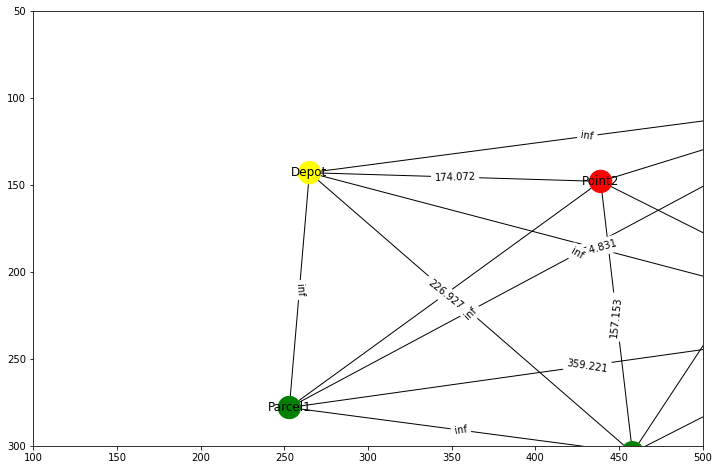

In [56]:
G = nx.Graph()

dist_val = 0

for pt in pt_arr:
    
    name = pt.name
    
    G.add_node(pt.name, pos = (pt.x, pt.y))
    
    for pt2 in pt_arr:
        dist_val = round(distance(pt, pt2), 3)
        if pt.name == pt2.name or ("Depot" in pt.name and "Point" in pt2.name) or ("Parcel" in pt.name and "Depot" in pt2.name) or ("Point" in pt.name and "Point" in pt2.name) or ("Parcel" in pt.name and "Parcel" in pt2.name):
            dist_val = float('inf')
        G.add_edge(pt.name, pt2.name, weight = dist_val)
    
color_map = []

for val in G.nodes():
    color = ""
    if "Depot" in val:
        color = "Yellow"
    elif "Parcel" in val:
        color = "Green"
    elif "Point" in val:
        color = 'Red'
    color_map.append(color)
        
pos = {pt.name : (pt.x, pt.y) for pt in pt_arr}
    
    
fig, ax = plt.subplots(figsize=(12, 8))

nx.draw(G, pos = pos, node_size = 500, node_color = color_map, ax = ax)  # draw nodes and edges
nx.draw_networkx_labels(G, pos=pos)

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels, ax = ax)

plt.axis("on")
ax.set_xlim(100, 500)
ax.set_ylim(50, 300)
ax.invert_yaxis()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

## Make Adjacency Matrix

In [57]:
adj_mat = []

name_arr = list(map(lambda x : x.name, pt_arr))

dist_val = 0

for pt in pt_arr:
    
    name = pt.name
    
    tmp_arr = []
    
    for pt2 in pt_arr:
        dist_val = round(distance(pt, pt2))
        if pt.name == pt2.name or ("Depot" in pt.name and "Point" in pt2.name) or ("Parcel" in pt.name and "Depot" in pt2.name) or ("Point" in pt.name and "Point" in pt2.name) or ("Parcel" in pt.name and "Parcel" in pt2.name):
            dist_val = float('inf')
        tmp_arr.append(dist_val)
    
    adj_mat.append(tmp_arr)
    
adj_df = pd.DataFrame(adj_mat, columns = df["Name"].tolist(), index = df["Name"].tolist())

# Convert adj_df to Float Type
adj_df = adj_df.astype(float)

adj_df

,Depot,Parcel1,Point2,Parcel3,Point4,Parcel5
Depot,inf,136.0,inf,251.0,inf,335.0
Parcel1,inf,inf,227.0,inf,359.0,inf
Point2,174.0,227.0,inf,157.0,inf,165.0
Parcel3,inf,inf,157.0,inf,168.0,inf
Point4,355.0,359.0,inf,168.0,inf,130.0
Parcel5,inf,inf,165.0,inf,130.0,inf


In [45]:
class Path:
    def __init__(self, path, cost):
        self.path = path
        self.cost = cost
        
    def __lt__(self, other):
        return self.cost <= other.cost
        
    def __str__(self):
        return f"Shortest Path:{self.path}\nMinimum Cost: {self.cost}"
    
    def __eq__(self, other):
        return self.path == other.path and self.cost == other.cost
    
    def getNodePath(self, name_arr):
        tmp_arr = list(map(lambda x : name_arr[x], self.path))
        return "->".join(tmp_arr)

In [46]:
def dfs_adv2(adj_mat, visited, path, cost, condition_arr, cur_node):
    visited[cur_node] = True
    path.append(cur_node)
    
    min_path = Path([], float('inf'))
    
    if len(path) > 1:
        cost += adj_mat[path[-2]][cur_node]
        
    tmp_arr = [visited[ind] for ind in condition_arr]
    
    if min(tmp_arr) == 1:
        cost += adj_mat[cur_node][0]
        min_path = Path(path.copy() + [0], cost)
    else:
        for i in range(len(adj_mat)):
            if visited[i] == False and adj_mat[cur_node][i] != 0:
                min_path2 = dfs_adv2(adj_mat, visited, path, cost, condition_arr, i)
                min_path = min(min_path, min_path2)
            
    path.pop()
    visited[cur_node] = False
    
    return min_path
    
def dfs_adv(adj_mat, name_arr, start_ind):
    visited = [False] * len(adj_mat)
    
    path = []
    
    cost = 0
    
    condition = [ind for (ind, val) in enumerate(name_arr) if "Point" in val]
    
    return dfs_adv2(adj_mat, visited, path, cost, condition, start_ind)

In [ ]:
start = time.process_time()
print(dfs_adv(adj_mat, name_arr, 0))
print(f"Time Taken: {time.process_time() - start}")

In [41]:
def getPossiblePath3(arr, visited, path, curr, condition):
    visited.add(curr)
    path.append(curr)
    
    final_path = []
    
    if len(path) == condition:
        final_path.append(path.copy())
    else:
        for val in arr:
            if val not in visited:
                final_path += getPossiblePath3(arr, visited, path, val, condition)
        
    path.remove(curr)
    visited.remove(curr)
    
    return final_path

def getPossiblePath2(arr, start, condition):
    visited = set()
    
    path = []
    
    return getPossiblePath3(arr, visited, path, start, condition)

def getPossiblePath(arr, condition = 1):
    final_arr = []
    for val in arr:
        final_arr += getPossiblePath2(arr, val, condition)
    return final_arr

In [42]:
getPossiblePath([1, 3, 5], 2)

[[1, 3], [1, 5], [3, 1], [3, 5], [5, 1], [5, 3]]

In [43]:
parcel_arr = [ind for (ind, val) in enumerate(name_arr) if "Parcel" in val]
point_arr = [ind for (ind, val) in enumerate(name_arr) if "Point" in val]

start = time.process_time()

p_parcel = getPossiblePath(parcel_arr, len(point_arr))
p_point = getPossiblePath(point_arr, len(point_arr))

print(len(p_parcel) * len(p_point))

print(f"Time Taken: {time.process_time() - start}")

start = time.process_time()

min_cost = float('inf')
min_path = []

tmp_arr = []

for parcel_points in p_parcel:
    for point_points in p_point:
        flag = False
        arr = [0]
        for i, j in zip(parcel_points, point_points):
            arr.append(i)
            arr.append(j)
        arr.append(0)
        
        tmp_arr.append("".join(map(str, arr)))
        
        cost = 0
        for i, j in zip(arr[:-1], arr[1:]):
            cost += adj_mat[i][j]
            if cost >= min_cost:
                flag = True
                break
                
        if flag:
            continue
        
        min_cost = cost
        min_path = arr
        
print(Path(min_path, min_cost))

print(f"Time Taken: {time.process_time() - start}")

3628800
Time Taken: 0.15625
Shortest Path:[0, 2, 1, 15, 13, 11, 10, 3, 4, 9, 7, 0]
Minimum Cost: 967
Time Taken: 56.859375


In [ ]:
tmp_arr = list(map(lambda x : name_arr[x], min_path))
print("\n".join(tmp_arr))

In [ ]:
# start = time.process_time()
# ans2 = dfs_adv(adj_mat, name_arr, 0)
# print(ans2)
# print(f"Time Taken: {time.process_time() - start}")